# __Hashing__

Winfred Lam, CFA

In a previous edition of The Analyst, we provided a high-level introduction to Object-Oriented Programming (OOP), which forms the backbone of the Python programming language. Having covered the basics of OOP and the concept of an "object", we will move onto a more advanced topic - Hashing, a key concept that goes hand in hand with objects in Python (and indeed many other OOP-centric languages). We then explore the concept of Equality in Python.

It would be challenging to go through hashing in Python without also referencing data structures. As such, the article will broadly cover:

1.   Data Structures
2.   Hashing
3.   Equality

Compared to Introduction To Object-Oriented Programming In Python, this write-up is a significant step-up in difficulty and assumes basic comfort with Python code, OOP and data structures. As before, explanation of programming concepts will be supported with relatable examples from the financial services industry.

__Data Structures in Python__

As covered in Introduction To Object-Oriented Programming In Python, users can create objects from their self-defined classes. More often than not, however, we will write Python code using more ubiquitous, built-in data structures such as integers, strings, lists etc. These variables are also objects. In fact, every data structure in Python is an object. 

There are two main categories of data structures in Python (and indeed, computer science): primitive and non-primitive. Primitive data structures (also called data types) are, for lack of a better word, simpler. Non-primitive data structures are more advanced, as it is a collection of data types. They can store primitive data types, but can also store other non-primitive data structures. There are, however, rules for storing the latter, which will be the centrepiece of this article. 

In Python, there are four primitive data types:



1.   Integers: whole numbers from negtive infinity to infinity, i.e. 1,2, 10, 
2.   Float: floating point number, usually ending with decimal figures, i.e. 1.2, 2.0, 10.3333, 50000.123
3.   Strings: a collection of alphabets. In python, a string is create by enclosing some sequence of alphabets with '' or "", i.e. 'python', 'finance', "programming"
4.   Boolean: only takes in the values True and False, interchangeable with the integers 1 and 0, essential to conditional and comparison expressions

On the other hand, we have non-primitive data structures:


1.   Array: stores a collection of homogeneous data types
2.   List: stores a collection of heterogeneous data structures 
3.   Dictionary: stores data in key:value pairs. Also known as Map.
4.   Set: stores a collection of unordered, nonduplicate (unique) objects
5.   Tuple: an immutable (unchangeable) sequence of objects. More on this later.

Our discussion is mostly concerned with non-primitive data structures. Typically, when people talk about arrays in Python, they are really referring to Lists, as arrays are not very popular in Python relative to other languages like Java, C, C++. While there are important fundamental differences between arrays and lists, that will not be the topic of discussion here. The focus will be on List, Dictionary, Set and Tuple.

All of the data structures List, Dictionary, Set and Tuple can store primitive data structures. Non-primitive data structures can also store objects from user-defined classes. Bringing back the "Securities" example from Introduction to Object-Oriented Programming in Python, let us define a Securities class, instantiate several Securities objects, and add them to the aforementioned data structures. We are also __overriding__ the __str__() and __repr__() methods so that the objects will show the "Name" of each Security object when we invoke the __print()__ method. (As always, the numbers used below are hypothetical and do not represent those of the securities actually trading on the stock exchange)

In [ ]:
class Security(object):
    def __init__(self, name, ticker, price, shares_outstanding):
        self.name = name
        self.ticker = ticker
        self.price = price
        self.shares_outstanding = shares_outstanding
    
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name

msft_stock = Security('Microsoft Corp', 'MSFT US Equity', 300, 20000000)
apple_stock = Security('Apple Inc', 'AAPL US Equity', 150, 2000000)
zsp_etf = Security('BMO S&P 500 Index ETF', 'ZSP CN Equity', 45, 100000)

In [ ]:
# Creating a list with two securities in them
# Then adding another one subsequently

security_list = [msft_stock, apple_stock]
security_list.append(zsp_etf)

# Printing. Notice that the ordering is same as the order in which they were added.
for security in security_list:
    print(security)

Microsoft Corp
Apple Inc
BMO S&P 500 Index ETF


In [ ]:
#Adding the securities to a set
security_set = set()

for element in security_list:
    security_set.add(element)

# Notice that ordering is not the same for the set compared the list, because a set is unordered.
for security in security_set:
    print(security)

Apple Inc
BMO S&P 500 Index ETF
Microsoft Corp


In [ ]:
#Adding securities to a dictionary. 
#The curly brackets {} indicate that security_headquarters is a dictionary.
#Suppose we want to map the city location of the headquarters of each company to its stock

security_headquarters = {'Redmond': msft_stock,
                       'Cupertino': apple_stock,
                       'Toronto': zsp_etf}

print(security_headquarters)
print(security_headquarters['Toronto'])

{'Redmond': Microsoft Corp, 'Cupertino': Apple Inc, 'Toronto': BMO S&P 500 Index ETF}
BMO S&P 500 Index ETF


In [ ]:
#If we have more than one key added to a dictionary, it will simply overwrite the prior entry
#In this case, 'cash', a string, has replaced zsp_etf

security_headquarters['Toronto'] = 'cash'
print(security_headquarters)
print(security_headquarters['Toronto'])

{'Redmond': Microsoft Corp, 'Cupertino': Apple Inc, 'Toronto': 'cash'}
cash


In [ ]:
#We can also use the custom objects as key, although in this case it would not make a lot of sense for our dictionary!

security_headquarters[zsp_etf] = apple_stock
print(security_headquarters)

{'Redmond': Microsoft Corp, 'Cupertino': Apple Inc, 'Toronto': 'cash', BMO S&P 500 Index ETF: Apple Inc}


__The Unhashable TypeError__

What about if we tried using a list of locations as a dictionary key for some custom ETF? Python will give us a TypeError saying the list is "unhashable":

In [ ]:
#list as dictionary key
custom_etf = Security('Custom ETF','CUST CN Equity',10, 1000)

locations_list = ['Redmond','Cuptertino','Toronto']

security_headquarters[locations_list] = custom_etf

TypeError: ignored

Alternatively, what about if we added a list to a set? We will get the same error.

In [ ]:
set_of_stocks = set()
security_list.append(custom_etf)
set_of_stocks.add(security_list)

TypeError: ignored

__Hashable__

Every list, dictionary or set we create is just an object. In Python, an object is said to be unhashable if the object does not have a hash value. But what is a hash value? What is hashing?

Hashing is the process of converting some key X into another value Y. A __hash function__ helps generate value Y via a __hash function__, which is done through some mathematical algorithm. The value Y is known as a __hash value__, also known simply as __hash__. Generally, the input is turned into a sequence of fixed length comprised of integers and/or alphabets.

The easiest example to explain this process is the creation of a password. When we create a password to login to a website, the password is not stored word for word on the website's database. If it was, it would not be a very good security system, as accounts would be easily compromised in the event that the website gets hacked, or if the database staff simply decided they wanted to have a peek at your account information. Instead, the password is hashed to produce a seemingly random, unreadable sequence that is stored on the server. This way, if the database does get compromised, the hacker (or staff) obtains the hash rather than your password. 

Python has a standard library called hashlib, which includes some of the known hashing algorithms. Below are examples of hashes produced with the MD5 hash function __md5()__:

In [ ]:
import hashlib

# show hash functions available
print(hashlib.algorithms_available)
print()

#md5
hash_val = hashlib.md5(b"CFA")
print(hash_val.hexdigest(), 'is the hash for CFA')

#Small changes matter a lot. By changing one letter of CFA to lowercase, we get a completely different hash sequence
hash_val2 = hashlib.md5(b"cFA")
print(hash_val2.hexdigest(), 'is the hash for cFA')

#Notice that increasing the length of the input string produces a hash of the same length
hash_val3 = hashlib.md5(b"CFA Society")
print(hash_val3.hexdigest(), 'is the hash for CFA Society')

{'md5-sha1', 'sha3_384', 'sha512_256', 'md4', 'sha256', 'blake2b', 'ripemd160', 'sha3_224', 'shake_128', 'sha1', 'blake2s', 'whirlpool', 'sha512', 'sha512_224', 'sm3', 'sha3_256', 'sha384', 'sha3_512', 'shake_256', 'sha224', 'md5'}

7d3e3deb50c19e7a3cafc081d9b3f23b is the hash for CFA
e8dd9b0a634a9e4d666947ed8daed46c is the hash for cFA
59018d5a5d867704f9bfdf7e181b8cbf is the hash for CFA Society


For a hash function to be effective in password protection, it has to fulfill certain conditions:

* For a given input, it must produce the same hash __every time__. Otherwise, you would type in the correct password and not be able to login because the hash did not match the one in the database.
* It must be a one-way function (i.e. not reversible). Otherwise, a hacker can easily reverse the hash and obtain your password. 
* The hash length must not change. As shown with MD5(), hashing is predicated on passing string of any length through a hash function and producing an output of fixed length. This means two passwords of different lengths still produce hashes of the same length.

As such, even if a password leak happens and a cybercriminal obtains all the hashes from a database, a strong hash function can act as the ultimate line of defense, making it difficult for the cybercriminal to derive the password from the hash. The calculations required to reverse a hash to its original input are extremely hard. Even if the cybercriminal is able to figure out what hash function was used, it is generally still faster to take a brute-force approach and feed millions of sequences into the hash function in the hope of producing a matching hash, a highly time-consuming process even for the strongest computers.

Sadly, this still does not mean your password is safe. Seasoned cybercriminals are familiar with common hash functions, and can calculate hashes for known words. Weak and common passwords can be broken very easily. All this to say, please do not set your password as 'password'. 

__Why Does This Matter In Data Structures?__

Hashing has many applications, namely in cryptography and cybersecurity (we just saw a small example of it), and it is also fundamental to data structures in programming. Essentially, a hash becomes a unique index for an element. Writing a good hash function is an art in itself and beyond the scope of this article. Fortunately, Python has a built-in hash function that can be invoked via the __hash__() method. In Python, the important properties of hashing are:

* The __hash()__ method only returns a hash for immutable objects
* A __hashable object__ is an object whose __hash value__ never changes. 
* If two hashable objects compare as equal, they must have the same hash value.

We can hash objects created from user-defined classes as well. In this case, let us produce the hash for the securities created. Unlike MD5(), the Python hash produces a sequence of integers.

In [ ]:
print('msft_stock hash:',hash(msft_stock))
print('apple_stock hash:',hash(apple_stock))
print('zsp_etf hash:',hash(zsp_etf))

msft_stock hash: 8741861339679
apple_stock hash: 8741861339673
zsp_etf hash: 8741861339676


__Immutable Objects__

Every object in Python is classified as either mutable or immutable or mutable. A mutable object is an object whose state can be modified after it has been defined. By contrast, an immutable object cannot be changed. This applies to both primitive and non-primitive data structures, as well as objects created from user-defined classes.

Primitive data types like integer, float, string and boolean are immutable. Conversely, all the non-primitive data structures we just covered are mutable. We saw an earlier example of the "not hashable" error when we tried to use a List as a key for a dictionary, and also when we tried to add it to a set. In comparison, the Tuple data structure is immutable, and is highly relied upon as keys in dictionaries when a sequence of numeric values are needed as a key.

The mutuable and immutable distinction is critical for data structures like dictionaries and sets. Even though they themselves are not hashable, they still rely heavily on hashing, as hashing allows elements stored in these data structures to be indexed.

* In a dictionary, for a key to reliably look up the mapped value, it must be able to discern between two keys. In the previous example, we saw that the adding an entry with an existing key will overwrite the value from a previous entry. As such, the dictionary must without fail recognize if a provided key is "the same" as an existing key. This is why a key for a dictionary must be a hashable object.
* In a set, the data structure needs to be able to judge whether a new element is a duplicate or not. That is, the set must be able to verify whether an element is "the same" when compared to existing elements.

In both cases, the hashes of two objects are compared to make this judgment. This brings us to our last discussion, what does it mean for two objects to be equal?

__Equality - Is GOOGL Equal to GOOG?__

For primitive data types like integers and strings, equality is very easy to evaluate and appears not worthy of another thought. Obviously:
* 1 == 1 is True
* 'CFA' == 'CFA' is True
* 12.00 == 100.00 is False
* 'Microsoft' == 'Apple' is False

But what about for objects created from user-defined classes. In our example, how do we evaluate whether two Security objects are equal? Consider the below example:

Alphabet Inc., the parent company of Google, is a publicly listed company on the Nasdaq exchange. If you have ever taken a look at the top 10 stocks in the S&P 500 Index, however, you will see that there are two classes. 

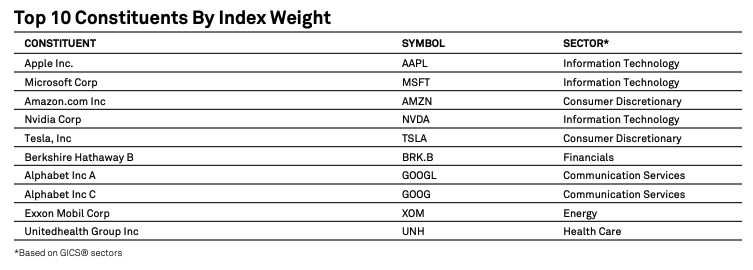

Source: S&P Dow Jones Indices as of 28 February, 2023

Both Alphabet Class A (GOOGL) and Alphabet Class C (GOOG) give shareholders ownership of the company. GOOGL and GOOG represent equal ownership, but GOOG does not provide voting rights and thus tends to trade at a slight discount. For large shareholders or activist investors who want to influence management decisions in the company, this distinction would matter.

However, for smaller investors, this distinction might not be as important. As far as portfolio returns are concerned, GOOGL and GOOG effectively provide the same risk-reward profile, and an investor might only want to know whether they "own Google" or not in their portfolios. 

How is this implemented in Python code? Suppose we create the two securities:

In [ ]:
google_stock_a = Security('Alphabet Inc', 'GOOGL US Equity', 90.1, 5000000)
google_stock_c = Security('Alphabet Inc', 'GOOG US Equity', 90, 5000000)

print(google_stock_a == google_stock_c)

False


From above, Python concludes that the two objects google_stock_a and google_stock_c are not equal, which is intuitively correct because the securities have different tickers and different prices. If we check the hash of google_stock_a and google_stock_c, we will see that they are different.

In [ ]:
print(hash(google_stock_a))
print(hash(google_stock_c))

8741861339633
8741861339456


For our purposes, however, this can be problematic if we want to limit individual security weight to some threshold, but the program fails to conclude that GOOGL and GOOG are shares of the same company. 

To illustrate, let's say we add google_stock_a to our previously defined security_set. To track whether we already own a security, we rely on the set's ability to only include non-duplicate elements so as to reject repeated additions. However, if we add google_stock_c, we will end up including Google twice because the set thinks it is a different security, and we end up with more Google than we want in the portfolio.

In [ ]:
security_set.add(google_stock_a)

security_set.add(google_stock_c)

for security in security_set:
    print(security)

Alphabet Inc
Alphabet Inc
Apple Inc
BMO S&P 500 Index ETF
Microsoft Corp


To let the program know that we want to treat all securities with the name "Alphabet Inc" as the same security, we need to __redefine (override)__ what it means for two objects of the Security class to be equal. (Actually, with regards to distinguishing the two in a set, it is enough to just override the __hash()__ method and not override the __eq()__ method. This is because two objects with the same hash does not necessarily have to be equal, but two equal objects MUST have the same hash. To make things less confusing, we will simply go through the whole process starting with __eq()__).

In Python, the equals method is denoted by __eq()__ in the constructor. Remember from Introduction To Object-Oriented Programming In Python that we can redefine (override) a method by simply adding a method with the same name. Going back to our Security class definition:

In [ ]:
class Security(object):
    def __init__(self, name, ticker, price, shares_outstanding):
        self.name = name
        self.ticker = ticker
        self.price = price
        self.shares_outstanding = shares_outstanding
    
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name
    
    def __eq__(self, other):
        return isinstance(other, Security) and self.name == other.name

In the __eq()__ method, we return True (i.e. the objects are equal) only if:

1.   The object2 being compared against object1 is also an instance of Security.
2.   The name attribute of the object2 (which is a string) is equal to the name attribute of object1.

In this case, we know google_stock_a and google_stock_c are both instances of the class Security. We also know that they both share the same "name" attribute, namely "Alphabet Inc". As seen below, the line __google_stock_a == google_stock_c__ will now return true, and we can use this boolean expression for other conditional comparisons.

In [ ]:
google_stock_a = Security('Alphabet Inc', 'GOOGL US Equity', 90.1, 5000000)
google_stock_c = Security('Alphabet Inc', 'GOOG US Equity', 90, 5000000)

print(google_stock_a == google_stock_c)

True


However, we will now run into a new problem -- because we redefined the __eq()__ method but did not also redefine the __hash()__ method, if we try adding the securities to a set, we will run into yet another unhashable type error, this time for the Security class.

In [ ]:
security_set.add(google_stock_a)

TypeError: ignored

Recall one of the core rules for hashing in Python:

* If two hashable objects compare as equal, they must have the same hash value.

As such, we also need to redefine (override) the hash method. As we ourselves defined two stocks to both be of the same company if they share the same name, regardless of ticker or price, we will implement it accordingly in the hash method, where we simply return the hash of self.name.

As self.name is a string, we know both hashes of the same name will return the same hash. Thus, this completes the override.

In [ ]:
class Security(object):
    def __init__(self, name, ticker, price, shares_outstanding):
        self.name = name
        self.ticker = ticker
        self.price = price
        self.shares_outstanding = shares_outstanding
    
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name
    
    def __eq__(self, other):
        return isinstance(other, Security) and self.name == other.name
    
    def __hash__(self):
        return hash(self.name)

In [ ]:
google_stock_a = Security('Alphabet Inc', 'GOOGL US Equity', 90.1, 5000000)
google_stock_c = Security('Alphabet Inc', 'GOOG US Equity', 90, 5000000)

print(google_stock_a == google_stock_c)
print(hash(google_stock_a))
print(hash(google_stock_c))

True
7249468942858777719
7249468942858777719


With the hash method override also implemented, now we can be sure objects created from the Security class will compare as we intended. As we can see below, a set will be able to successfully reject "duplicates". We create a new set __security_set2__ and add both google_stock_a and google_stock_c to it, but the set correctly rejects the second addition because it now recognizes that they are the same stock, leaving only google_stock_a in the set. Now, we know we will not end up buying more Google stocks than we wanted!

In [ ]:
security_set2 = set()

security_set2.add(google_stock_a)
security_set2.add(google_stock_c)

print("Set size:",len(security_set2))

for security in security_set2:
    print(security, ',', security.ticker)

Set size: 1
Alphabet Inc , GOOGL US Equity


__Conclusion__

This writeup introduces the basic mechanics of hashing, a mathematical algorithm that often works behind the scenes but is in fact critical to OOP and programming. We also explored the concept of object equality, as well as how some of the most ubiquitous data structures in Python rely on hashing. Hashing also plays a crucial role in the lives of billions of non-programmers, and is applied in everything from password verification, cryptography, search algorithms and blockchain. This humble process of transforming a given string of arbitrary length into another string of fixed length contributes far more to our lives than meets the eye! 

Winfred Lam, CFA, is a Senior Product Manager at BMO Global Asset Management and a graduate student in computer science at the University of Pennsylvania. He is a volunteer member of CFA Society Toronto’s Member Communication Committee.